In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as imageio
import pandas as pd

In [19]:
im = imageio.imread("./imagenes/s3/3.pgm") #cargamos imagen
im = im.astype(np.uint8) # le decimos tipo de n;úmero que tiene dentro el archivo

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [22]:
print("Max original:", end = " ")
print(np.amax(im))
print("Min original:", end = " ")
print(np.amin(im))

Max original: 204
Min original: 10


In [24]:
# transformamos nuestra imagen
# la normalizamos dividiendo sus valores entre 0 - 255

im_original = im

im = im / 255

print("Max original:", end = " ")
print(np.amax(im))
print("Min original:", end = " ")
print(np.amin(im))

Max original: 0.0031372549019607846
Min original: 0.00015378700499807767


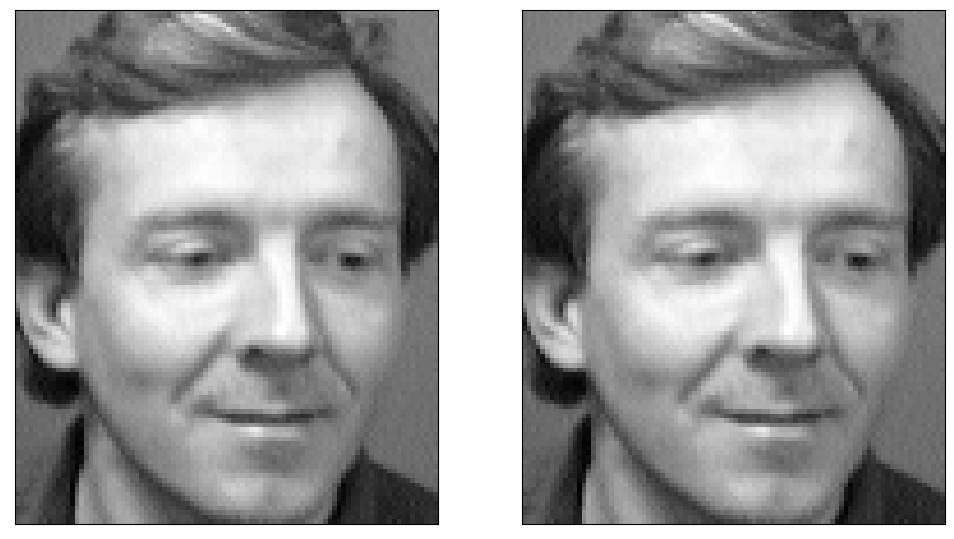

In [27]:
# vamos a verificar diferencias entre las imagenes al momento de graficarlas

fix, ax = plt.subplots(1, 2, figsize=(12, 12),
                      subplot_kw = {"xticks" : [], "yticks" : []}
                     )

ax[0].imshow(im_original, cmap="gray")
ax[1].imshow(im, cmap="gray")

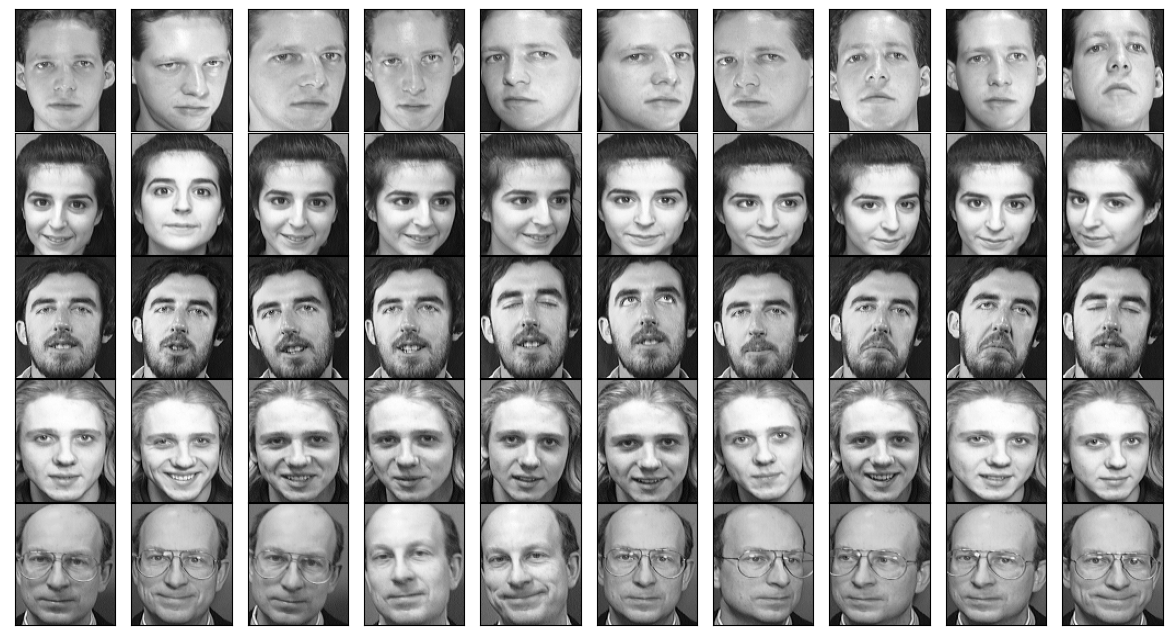

In [32]:
# leeremos todas las im;ágenes del directorio de imagenes
# el conjunto (la carpeta) de imagenes esta conformado...
# por mas de 40 personas cada uno con 10 fotos

from glob import iglob

# creamos dataframe de pandas para guardar los datos de cada una de las imagenes

caras = pd.DataFrame([])

for path in iglob("./imagenes/*/*.pgm"): # recorremos cada carpeta de sujetos y cada archivo adentro 
    im = imageio.imread(path) # guardamos la imagen
    cara = pd.Series(im.flatten(), name=path) # cara contiene la imagen en forma de vector, aplanamos la matriz
    caras = caras.append(cara)
    
# mostraremos 5 filas de sujetos, 10 fotos de cada sujeto
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap="gray")
    

In [33]:
# reduciremos dimensiones de conjunto de imagenes usando PCA
# Analisis de componentes principales

# procesamos el conjunto con sklear.decomposition pca

from sklearn.decomposition import PCA

In [35]:
caras_pca = PCA(n_components = 0.5) #aplicamos pca y que el numero de componentes requeridos se el necesarios...
#... para quedarme con el 50% = 0.5 de la variacion de los datos

caras_pca.fit(caras)

PCA(n_components=0.5)

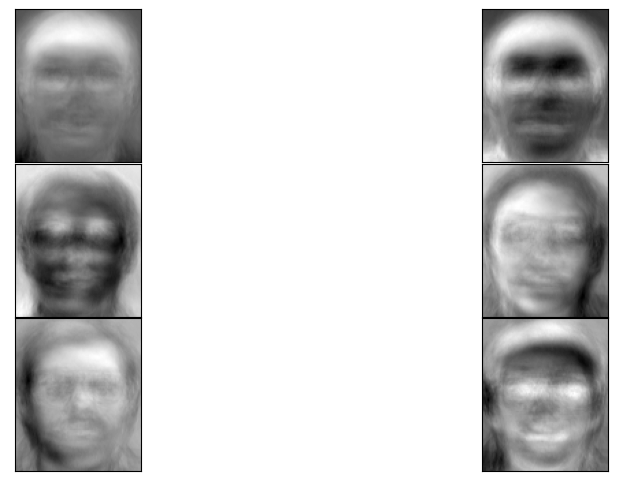

In [36]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap="gray")

In [37]:
print(caras_pca.n_components_)

6


In [38]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

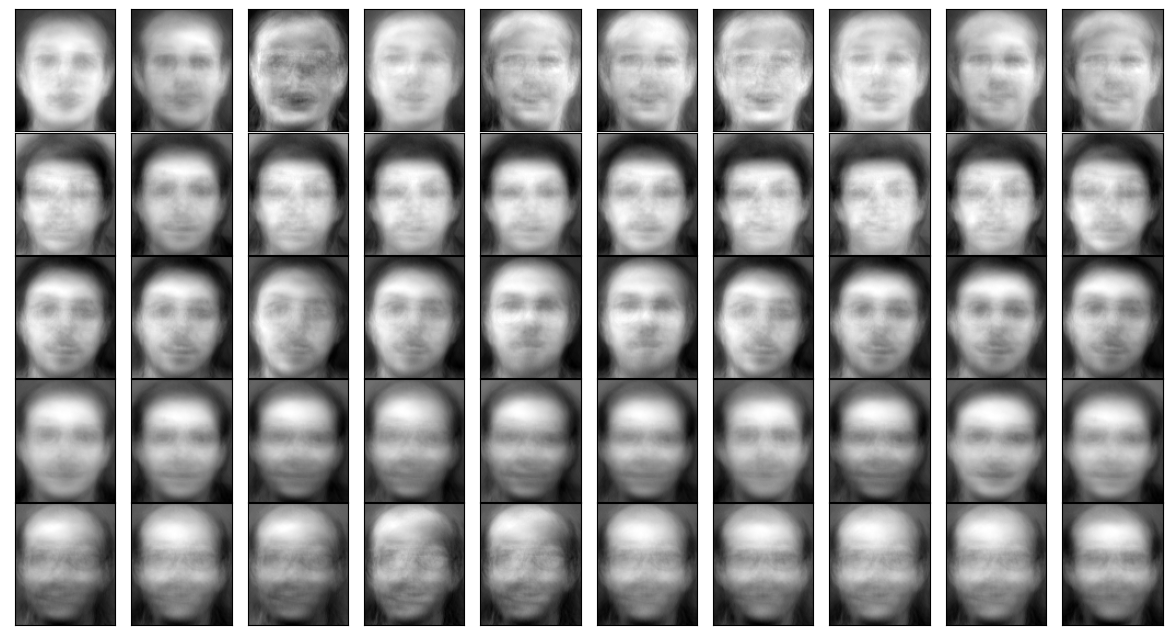

In [39]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap="gray")

In [40]:
# si ponemos el 80% verificamos a cuanto aumenta la cantidad de elementos que necesitamos

caras_pca = PCA(n_components = 0.8) #aplicamos pca y que el numero de componentes requeridos se el necesarios...
#... para quedarme con el 80% = 0.8 de la variacion de los datos

caras_pca.fit(caras)

PCA(n_components=0.8)

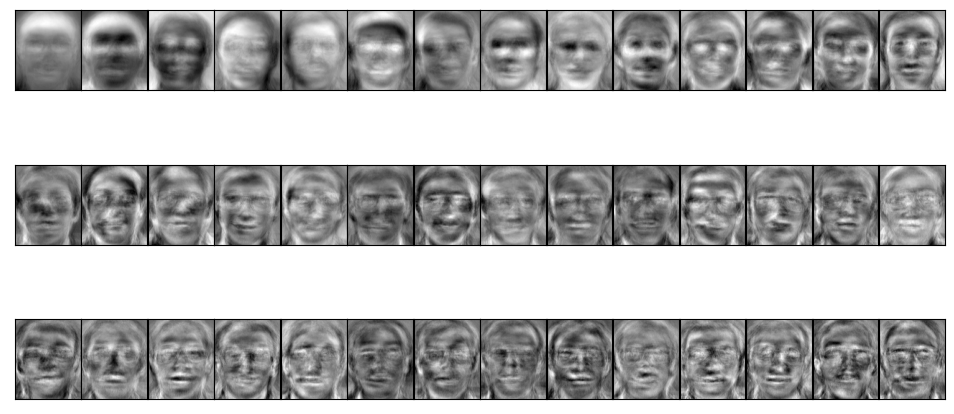

In [41]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap="gray")

In [42]:
print(caras_pca.n_components_)

44


In [43]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

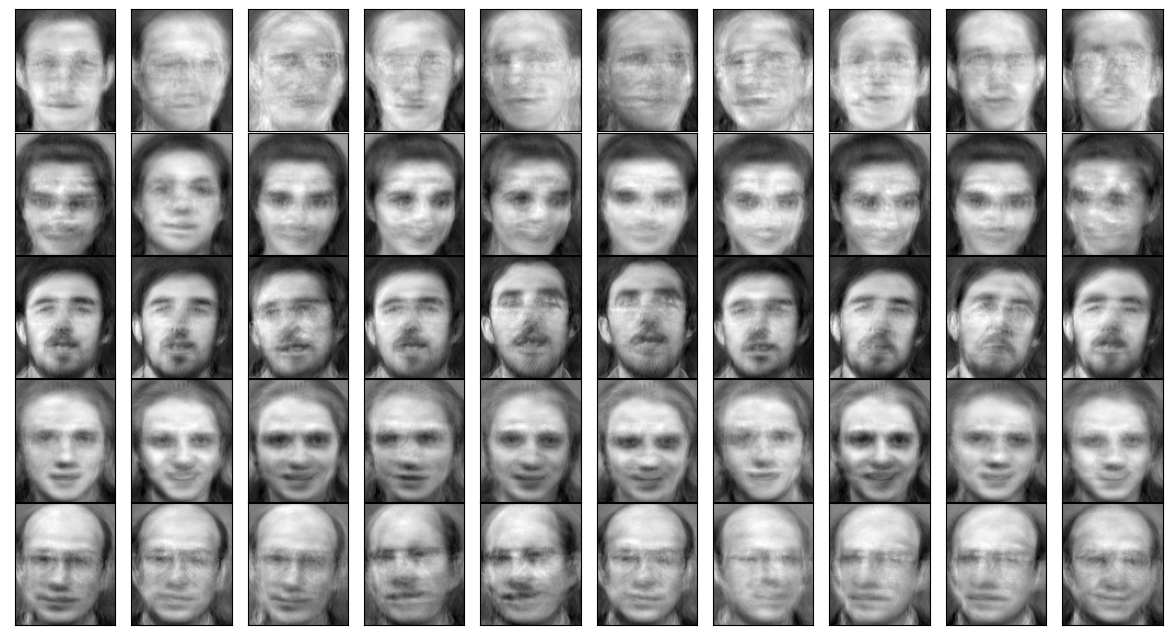

In [44]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap="gray")

In [45]:
# si ponemos el 99.9% verificamos a cuanto aumenta la cantidad de elementos que necesitamos

caras_pca = PCA(n_components = 0.999) #aplicamos pca y que el numero de componentes requeridos se el necesarios...
#... para quedarme con el 99.9% = 0.999 de la variacion de los datos

caras_pca.fit(caras)

PCA(n_components=0.999)

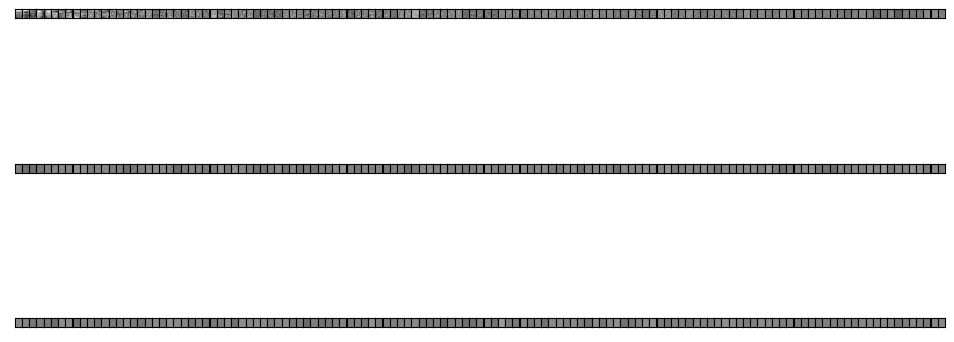

In [46]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap="gray")

In [47]:
print(caras_pca.n_components_)

388


In [48]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

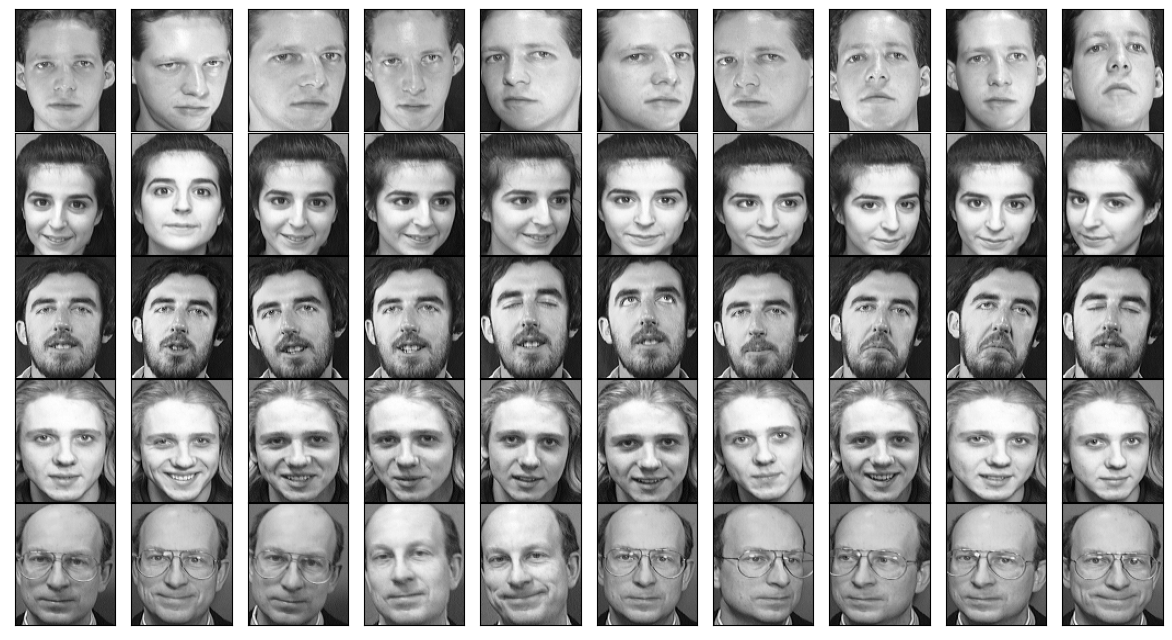

In [49]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {"xticks":[], "yticks":[]}, #no queremos ejes en los graficos
                       gridspec_kw = dict(hspace=0.01, wspace=0.01) # configuramos espacio entre imagenes
                      )

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap="gray")